In [2]:
from pydataset import data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

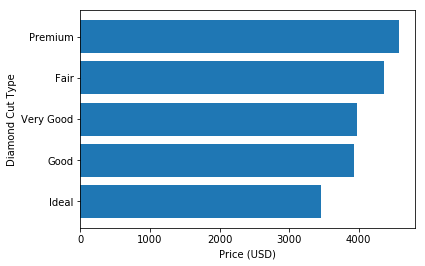

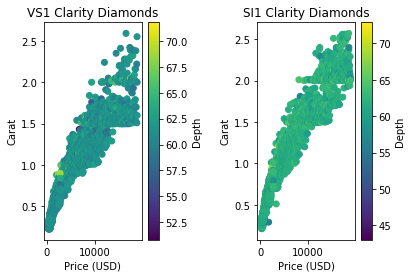

In [26]:
def problem_1():
    diamonds = data('diamonds')
    
    cut_type = diamonds.groupby('cut')
    means = cut_type.mean().sort_values('price',ascending=True)
    cuts = np.array(means.index)
    positions = np.arange(len(cuts))
    plt.barh(positions, np.array(means['price']),align='center')
    plt.yticks(positions,cuts)
    plt.ylabel('Diamond Cut Type')
    plt.xlabel('Price (USD)')
    plt.show()
    
    clear = diamonds.groupby('clarity')
    VS1 = clear.get_group('VS1')
    SI1 = clear.get_group('SI1')
    fig, axes = plt.subplots(nrows=1, ncols=2)
    plt.subplot(121)
    plt.scatter(np.array(VS1['price']),np.array(VS1['carat']),c=np.array(VS1['depth']))
    cbar = plt.colorbar()
    cbar.set_label('Depth')
    plt.ylabel('Carat')
    plt.xlabel('Price (USD)')
    plt.title('VS1 Clarity Diamonds')
    
    plt.subplot(122)
    plt.scatter(np.array(SI1['price']),np.array(SI1['carat']),c=np.array(SI1['depth']))
    cbar = plt.colorbar()
    cbar.set_label('Depth')
    plt.ylabel('Carat')
    plt.xlabel('Price (USD)')
    plt.title('SI1 Clarity Diamonds')
    
    fig.subplots_adjust(wspace=.75, hspace=.5)
    plt.show()
problem_1()

Two visuals were created for the diamonds data set. The first visual is a horizontal bar graph that was created using groupby on the diamond cut type and lists the average price from highest to lowest. Contrary to popular belief about naming conventions, 'ideal' cut diamonds have the lowest average price and 'premium' cut diamonds have the highest average price. 
The next visual is a side by side comparison of the price, carat, and depth of VS1 and SL1 diamonds, which were created using groupby on the clarity of the diamonds. As seen, there is a similar trend between price and carat for both diamond clarities, though there are more higher priced and carat diamonds for the SL1 clarity diamonds. In addition, the depths of the SL1 diamonds are deeper than that of VS1 diamonds as evidenced by the color bar. 

In [14]:
def problem_2():
    df = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk2_VisPandas/titanic.csv")
    
    embark_town = df.groupby('Embarked')
    print('Average Survival Rate by Embarked Town')
    means = embark_town.mean().sort_values('Survived',ascending=True)['Survived']
    print(means, '\n')
    
    print('Average Survival Rate by Gender and Embarked Town')
    piv1 = df.pivot_table('Survived', index='Sex',columns='Embarked')
    print(piv1, '\n')
    
    print('Average Survival Rate by Gender, Class, and Embarked Town')
    piv2 = df.pivot_table('Survived', index='Sex',columns=['Embarked','Pclass'])
    print(piv2, '\n')
    
    age = pd.cut(df['Age'], [0,12,18,80])
    print('Average Survival Rate by Gender, Class, Age, and Embarked Town')
    piv3 = df.pivot_table('Survived', index=['Sex',age],columns=['Embarked','Pclass'])
    print(piv3, '\n')
    
    print('Average Number of Passengers by Gender, Class, Age, and Embarked Town')
    piv4 = df.pivot_table('Survived', index=['Sex',age],columns=['Embarked','Pclass'],aggfunc='count')
    print(piv4)

problem_2()

Average Survival Rate by Embarked Town
Embarked
S    0.332604
Q    0.357724
C    0.555556
Name: Survived, dtype: float64 

Average Survival Rate by Gender and Embarked Town
Embarked         C         Q         S
Sex                                   
female    0.902655  0.616667  0.680412
male      0.305732  0.111111  0.170144 

Average Survival Rate by Gender, Class, and Embarked Town
Embarked         C                        Q                        S  \
Pclass         1.0       2.0       3.0  1.0  2.0       3.0       1.0   
Sex                                                                    
female    0.971831  1.000000  0.709677  1.0  1.0  0.589286  0.956522   
male      0.400000  0.294118  0.214286  0.0  0.0  0.122807  0.305556   

Embarked                      
Pclass         2.0       3.0  
Sex                           
female    0.870968  0.395349  
male      0.134228  0.144809   

Average Survival Rate by Gender, Class, Age, and Embarked Town
Embarked                C     

First of all, from the first grouby() call, we notice that C has the highest survival rate, then Q followed by S, which has the lowest survival rate. If we split the pibot table by gender, we note that C has a far higher survival rate than both S and Q, and that S actually has a higher survival rate for each gender than Q. Next, we split it by gender and class, and see that there are very high survival rates for females in first class for all three towns and lower rates for other groups. We also split it by age and notice a lack of passengers in first class from Q. Finally, we look at the pivot table of the number of people by gender, class, age, and embarked town, and we see that C has mostly first class passengers (and some third class males) whereas Q has much fewer passengers, most of whom are in third class. Finally, S has many passengers in all three classes. Therefore, the different survival rates by town are reflective of the socioeconomic and demographic makeup of the passengers embarking from that town rather than the town having an actual effect.